In [152]:
#导入库
import tensorflow as tf
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from keras import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D,BatchNormalization,  MaxPool2D
import numpy as np
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from keras.utils import to_categorical
import pandas

In [153]:
#下载数据
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [154]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [155]:
#数据处理：规范化；规范化图像数据的处理步骤，主要是为了确保输入数据的格式符合模型的要求。
img_r,img_c=28,28
x_train=x_train.reshape(x_train.shape[0],img_r,img_c,1)
x_test=x_test.reshape(x_test.shape[0],img_r,img_c,1)
input_shape=(img_r,img_c,1)
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [156]:
#将数据类型转换为float32
X_train=x_train.astype('float32')
X_test=x_test.astype('float32')
#数据归一化
X_train/=255
X_test/=255

In [157]:
#将类别标签转为独热编码
Y_train=to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)

In [158]:
##构建网络
#一个典型的卷积神经网络CNN的构建过程
#创建一个序贯模型，即按照顺序一层一层地堆叠神经网络层。
model = Sequential()
#卷积层。这些层用于提取图像中的特征。
#卷积核数量为32，卷积核大小为3*3，指定输入图像的形状为32x32，激活函数使用ReLU
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=input_shape,activation='relu'))

#卷积核数量为64，卷积核大小为3*3，指定输入图像的形状为32x32，且具有1个通道。激活函数使用ReLU
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
#池化层
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
#展平层。将多维的特征图展开成一维向量，为连接全连接层做准备。
model.add(Flatten())
#全连接层。这些层将前面卷积层提取的特征进行整合和分类。
#有128个神经元的全连接层，使用ReLU激活函数。
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
#具有10个神经元的全连接输出层，使用softmax激活函数，用于多类别分类问题，输出每个类别的概率分布。
model.add(Dense(10, activation='softmax'))

In [159]:
#配置神经网络模型的编译过程。
#METRICS列表，定义三个用于评估模型性能的指标。
METRICS = [
    #准确率
    'accuracy',
    #精确率，用于度量模型在正类别上的预测准确性。
    tf.keras.metrics.Precision(name='precision'),
    #召回率，用于度量模型在真实正类别中成功预测的比例。
    tf.keras.metrics.Recall(name='recall')
]

In [160]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=METRICS)

In [161]:
#EarlyStopping 是 Keras 中的一个回调函数，它允许在模型训练过程中停止训练，以避免过拟合。
#patience=2 表示如果连续两个 epoch 验证集上的损失都没有减小，就停止训练。
early_stop = EarlyStopping(monitor='val_loss', patience=2)
#定义每一批次的训练集个数为32
batch_size = 32
#用于数据增强，通过对训练数据进行一系列随机变换来扩充数据集，有助于提高模型的泛化能力。
#width_shift_range 和 height_shift_range 表示在水平和垂直方向上进行随机平移，horizontal_flip=True 表示进行随机水平翻转。
data_generator = ImageDataGenerator(width_shift_range=0.01, height_shift_range=0.01, horizontal_flip=True)
#生成一个数据生成器，用于实时生成批次的增强数据。
train_generator = data_generator.flow(X_train, Y_train, batch_size)

In [162]:
model.fit(X_train,
          Y_train,
          batch_size=1024,
          epochs=5,#训练次数为36
          verbose=2,
          #在训练过程中评估模型性能的验证数据
          validation_data=(X_test, Y_test),
             )

Epoch 1/5


2024-01-06 13:00:32.830688: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_7/dropout_12/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


59/59 - 3s - loss: 0.5561 - accuracy: 0.8313 - precision: 0.9102 - recall: 0.7556 - val_loss: 0.1561 - val_accuracy: 0.9511 - val_precision: 0.9615 - val_recall: 0.9419 - 3s/epoch - 57ms/step
Epoch 2/5
59/59 - 2s - loss: 0.1770 - accuracy: 0.9478 - precision: 0.9596 - recall: 0.9375 - val_loss: 0.0694 - val_accuracy: 0.9782 - val_precision: 0.9831 - val_recall: 0.9754 - 2s/epoch - 26ms/step
Epoch 3/5
59/59 - 2s - loss: 0.1075 - accuracy: 0.9678 - precision: 0.9734 - recall: 0.9618 - val_loss: 0.0509 - val_accuracy: 0.9838 - val_precision: 0.9863 - val_recall: 0.9816 - 2s/epoch - 26ms/step
Epoch 4/5
59/59 - 1s - loss: 0.0827 - accuracy: 0.9751 - precision: 0.9792 - recall: 0.9714 - val_loss: 0.0442 - val_accuracy: 0.9846 - val_precision: 0.9868 - val_recall: 0.9831 - 1s/epoch - 25ms/step
Epoch 5/5
59/59 - 2s - loss: 0.0698 - accuracy: 0.9791 - precision: 0.9825 - recall: 0.9760 - val_loss: 0.0401 - val_accuracy: 0.9866 - val_precision: 0.9887 - val_recall: 0.9846 - 2s/epoch - 25ms/step


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_14 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 12, 12, 64)        0         
 g2D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 12, 12, 64)        0         
                                                                 
 flatten_6 (Flatten)         (None, 9216)              0         
                                                                 
 dense_12 (Dense)            (None, 128)               1179776   
                                                      

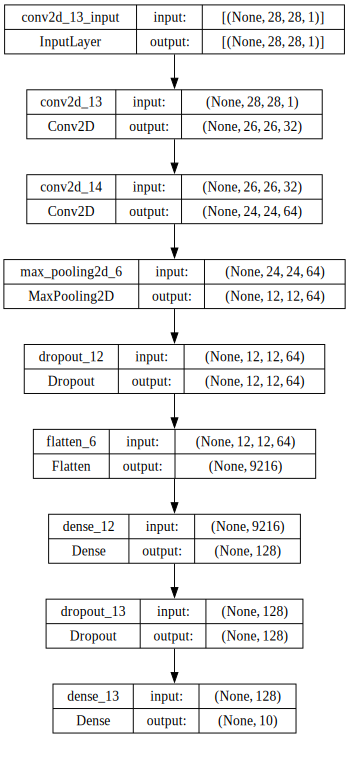

In [163]:
#输出网络模型架构
model.summary()
from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot
SVG(model_to_dot(model,show_shapes=True,dpi=70).create(prog='dot', format='svg'))

<Axes: >

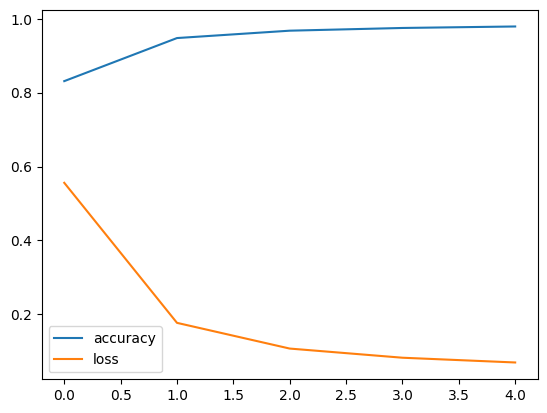

In [164]:
#获取模型训练的历史记录，并将其存储在一个 Pandas DataFrame 中。
#model.history 包含了模型在训练过程中的各种信息，如损失值、准确度等。history 属性是一个字典，包含了这些信息的历史记录。
history = model.history.history
df=pd.DataFrame(model.history.history)
#绘制训练过程中准确度（accuracy）和验证准确度（val_accuracy）的曲线图
df[['accuracy','loss']].plot()

<Axes: >

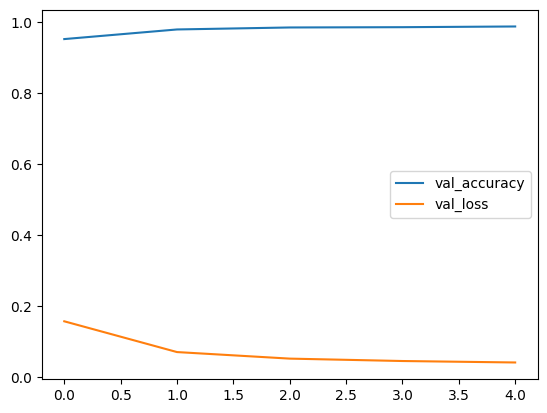

In [165]:
#绘制了训练过程中损失度（loss）和验证准确度（val_loss）的曲线图
df[['val_accuracy','val_loss']].plot()

In [166]:
#评估模型在测试集上的性能
model.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0402 - accuracy: 0.9866 - precision: 0.9887 - recall: 0.9846


[0.04018190875649452,
 0.9865999817848206,
 0.9886534810066223,
 0.9846000075340271]

In [167]:
#用模型对测试集x_test进行预测，并将预测结果转换为对应类别的索引值，并存储在predictions数组中。
predictions=np.argmax(model.predict(x_test),1)
#模型在测试集上的性能进行详细的分类报告分析
print(classification_report(y_test,predictions))

313/313 [==============================] - 1s 1ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.96      0.98      1135
           2       0.98      0.98      0.98      1032
           3       0.98      1.00      0.99      1010
           4       1.00      0.99      0.99       982
           5       0.99      0.97      0.98       892
           6       0.98      0.98      0.98       958
           7       1.00      0.97      0.98      1028
           8       0.91      0.99      0.95       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [168]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

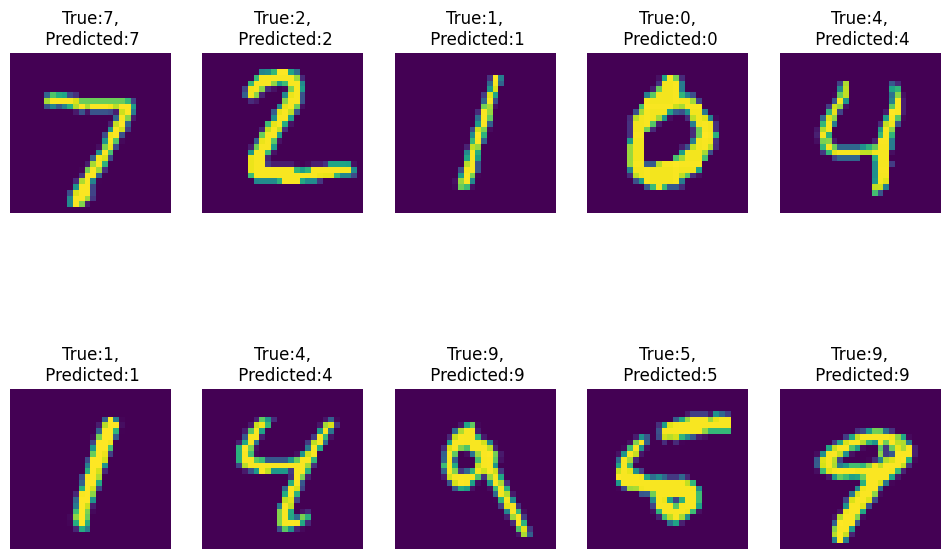

In [169]:
#展示模型对测试集的前 10 个样本的预测结果
def guess(x, y):#, index):
    #创建一个新的图形（figure），设置图形的大小为 12x8 英寸。这个图形用于容纳后续绘制的子图。
    plt.figure(figsize = (12,8))#(15,2))
    for i in range(10):
        #设置当前子图的位置
        plt.subplot(2, 5, i+1)
        #显示图像数据。x[i] 表示第 i 个样本的图像。
        plt.imshow(x[i])
        #设置子图的标题，显示真实标签和模型的预测标签。
        plt.title(f"True:{y_test[i]},\n Predicted:{predictions[i]}")
        #关闭子图的坐标轴，使图像更加美观。
        plt.axis('off')
guess(X_test, y_test)

In [170]:
test_ds = pandas.read_csv("/kaggle/input/digit-recognizer/test.csv")
test_ds = np.array(test_ds).reshape((-1, 28, 28, 1)) / 255
y_pred = model.predict(test_ds)
predictions = []
for it in y_pred:
    predictions.append(np.argmax(it))

875/875 [==============================] - 1s 2ms/step


In [171]:
submission = pandas.DataFrame({
    "ImageId":range(1, 28001),
    "Label":predictions
})
submission

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [172]:
submission.to_csv('submission9.csv', index = False)